In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch, Rectangle



pd.set_option("display.max_columns", None)
passing_df = pd.read_csv('../data/processed/fbref/ENG-Premier League/2024-2025/player_season/passing.csv', usecols=["team", "player", "player_id","position", "fpl_pos", "att", "cmp", "prgp", "90s", "cmp_cmp", "1_3", "kp", "prgdist"])
passing_2024_df = pd.read_csv('../data/processed/fbref/ENG-Premier League/2023-2024/player_season/passing.csv', usecols=["team", "player", "player_id","position","fpl_pos","att", "cmp", "prgp", "90s", "cmp_cmp", "1_3", "kp", "prgdist"])
poss_df = pd.read_csv('../data/processed/fbref/ENG-Premier League/2024-2025/player_season/possession.csv', usecols=["season","player_id", "touches", "def_3rd", "def_pen", "att", "succ", "carries", "prgc", "prgdist", "dis", "rec", "prgr"])
poss_2024_df = pd.read_csv('../data/processed/fbref/ENG-Premier League/2023-2024/player_season/possession.csv', usecols=["season","player_id", "touches", "def_3rd", "def_pen", "att", "succ", "carries", "prgc", "prgdist", "dis", "rec", "prgr"])

passing_df = passing_df.rename(columns={"cmp_cmp": "cmp_pct"})
passing_2024_df = passing_2024_df.rename(columns={"cmp_cmp": "cmp_pct"})
poss_df = poss_df.rename(columns={"att": "takeons", "prgdist": "prgcdist", "dis": "dispossessed"})
poss_2024_df = poss_2024_df.rename(columns={"att": "takeons", "prgdist": "prgcdist", "dis": "dispossessed"})

df_2024 = passing_2024_df

df_2024 = df_2024.merge(
    poss_2024_df, 
    on=["player_id"],
    how="left")


df = passing_df

df = df.merge(
    poss_df, 
    on=["player_id"],
    how="left")

#df = df.merge(
#    df_2024[["player_id", "90s","touches", "def_3rd", "def_pen", "takeons", "succ", "carries", "prgc", "prgcdist", "dispossessed", "rec", "prgr", "att", "cmp", "prgp", "cmp_pct", "1_3", "kp", "prgdist"]],
#    on=["player_id"],
#    how="left",
#    suffixes=("", "_2024")
#)


midfielders = df.loc[df["fpl_pos"] == "MID"].copy()
midfielders = midfielders.loc[midfielders["90s"] >= 5].copy()

mids = df_2024.loc[df_2024["fpl_pos"]=="MID"].copy()
mids = mids.loc[mids["90s"] >= 5].copy()

display(midfielders.head())
display(mids.sort_values(by="carries", ascending=False).head(10))

,team,player,90s,cmp,att,cmp_pct,prgdist,kp,1_3,prgp,player_id,position,fpl_pos,season,touches,def_pen,def_3rd,takeons,succ,carries,prgcdist,prgc,dispossessed,rec,prgr
1,ARS,Bukayo Saka,19.2,552,731,75.5,2487,58,15,70,c00b591b,FWD,MID,2425,979,6,57,90,41,628,2460,96,40,711,255
3,ARS,Declan Rice,31.4,1376,1650,83.4,6234,59,137,192,59424615,MID,MID,2425,1948,82,325,29,14,1031,3394,90,32,1266,94
4,ARS,Ethan Nwaneri,9.9,342,425,80.5,1216,16,17,33,52ea9334,FWD,MID,2425,544,3,44,62,37,365,1329,46,17,398,113
7,ARS,Gabriel Martinelli,25.4,499,699,71.4,1534,40,11,52,b6f0558f,FWD,MID,2425,994,17,102,109,33,670,2620,124,38,752,289
9,ARS,Jorginho,7.8,411,474,86.7,1609,3,44,48,5be7a3e1,MID,MID,2425,522,9,93,4,1,302,874,12,9,389,6


,team,player,90s,cmp,att,cmp_pct,prgdist,kp,1_3,prgp,player_id,position,fpl_pos,season,touches,def_pen,def_3rd,takeons,succ,carries,prgcdist,prgc,dispossessed,rec,prgr
376,MCI,Rodri,32.6,3365,3656,92.0,15766,49,378,376,bdf572d7,MID,MID,2324,3988,114,664,64,42,2513,6408,76,32,3242,55
141,BHA,Pascal Groß,34.6,2774,3223,86.1,13360,103,242,302,8695796f,MID,MID,2324,3534,133,826,30,16,2284,5189,83,28,2736,180
417,NEW,Bruno Guimarães,36.3,1941,2313,83.9,9336,62,184,283,d307d495,MID,MID,2324,2734,90,573,132,72,1842,4241,65,70,2107,73
5,ARS,Declan Rice,35.8,2041,2295,88.9,9378,47,240,278,59424615,MID,MID,2324,2650,100,581,46,21,1675,5139,75,22,1928,64
18,ARS,Martin Ødegaard,34.3,1692,2006,84.3,7898,102,160,344,06ab6f9c,MID,MID,2324,2326,24,244,81,37,1563,3514,91,58,1827,202
352,MCI,Bernardo Silva,28.6,1671,1936,86.3,5246,64,100,177,b845a912,MID,MID,2324,2194,39,245,61,38,1500,4544,140,34,1757,260
190,CHE,Conor Gallagher,34.8,1801,2018,89.2,5954,52,135,172,808a57c7,MID,MID,2324,2443,77,468,65,38,1453,2979,62,39,1739,122
374,MCI,Phil Foden,31.7,1511,1767,85.5,3769,73,71,168,00a05a27,FWD,MID,2324,2146,22,174,102,47,1435,3434,93,49,1753,269
122,BHA,Billy Gilmour,23.6,1915,2107,90.9,7671,22,183,193,f70870eb,MID,MID,2324,2277,67,447,23,8,1410,3120,39,9,1871,33
32,AVL,Douglas Luiz,33.3,1800,2101,85.7,7807,53,137,168,cac8d239,MID,MID,2324,2351,81,519,47,24,1394,3562,60,31,1638,50


In [2]:
midfielders.columns.value_counts().loc[lambda s: s > 1]


Series([], Name: count, dtype: int64)

In [3]:
#passes per 90
ppg = midfielders["cmp"] / midfielders["90s"]
distpg = midfielders["prgdist"] / midfielders["90s"]
prg = midfielders["prgp"] / midfielders["90s"]
touches = midfielders["touches"] / midfielders["90s"]
def_pen = midfielders["def_pen"] / midfielders["90s"]
carries = midfielders["carries"] / midfielders["90s"]
def_3rd = midfielders["def_3rd"] / midfielders["90s"]
d_p90 = midfielders["dispossessed"] / midfielders["90s"]


midfielders["passes_p90"] = round(ppg, 2)
midfielders["prg_distp90"] = round(distpg, 2)
midfielders["prg_passes90"] = round(prg, 2)
midfielders["touches_p90"] = round(touches, 2)
midfielders["def_pen_p90"] = round(def_pen, 2)
midfielders["carries_p90"] = round(carries, 2)
midfielders["def_3rd_p90"] = round(def_3rd, 2)
midfielders["d_90"] = round(d_p90, 2)



In [4]:
#passes per 90 2023-2024 season 
ppg = mids["cmp"] / mids["90s"] 
distpg = mids["prgdist"] / mids["90s"] 
prg = mids["prgp"] / mids["90s"] 
touches = mids["touches"] / mids["90s"] 
def_pen = mids["def_pen"] / mids["90s"] 
carries = mids["carries"] / 90 
def_3rd = mids["def_3rd"] / mids["90s"] 
d_p90 = mids["dispossessed"] / mids["90s"] 

mids["passes_p90"] = round(ppg, 2) 
mids["prg_distp90"] = round(distpg, 2) 
mids["prg_passes90"] = round(prg, 2) 
mids["touches_p90"] = round(touches, 2) 
mids["def_pen_p90"] = round(def_pen, 2) 
mids["carries_p90"] = round(carries, 2) 
mids["def_3rd_p90"] = round(def_3rd, 2) 
mids["d_90"] = round(d_p90, 2)

In [5]:
#Setting the metrics to be displayed 2024-2025 season and 2023-2024 season

touches = (
	midfielders.groupby("player", as_index=False)[["touches_p90"]]
	.mean()
	.sort_values("touches_p90", ascending=False)
)

passes = (
    midfielders.groupby("player", as_index=False)[["passes_p90"]]
    .mean()
    .sort_values("passes_p90", ascending=False)
)

prg_passes = (
    midfielders.groupby("player", as_index=False)[["prg_passes90"]]
    .mean()
    .sort_values("prg_passes90", ascending=False)
)

dispossessed = (
    midfielders.groupby("player", as_index=False)[["d_90"]]
    .mean()
    .sort_values("d_90", ascending=False)
)






,team,player,90s,cmp,att,cmp_pct,prgdist,kp,1_3,prgp,player_id,position,fpl_pos,season,touches,def_pen,def_3rd,takeons,succ,carries,prgcdist,prgc,dispossessed,rec,prgr,passes_p90,prg_distp90,prg_passes90,touches_p90,def_pen_p90,carries_p90,def_3rd_p90,d_90,legend
265,FUL,Tom Cairney,7.0,569,627,90.7,1910,11,53,53,bcd71483,MID,MID,2425,683,12,123,13,5,456,1047,18,4,553,33,81.29,272.86,7.57,97.57,1.71,65.14,17.57,0.57,Other
374,MCI,Mateo Kovačić,24.4,1742,1882,92.6,7278,33,206,164,896e8a83,MID,MID,2425,2123,53,318,41,22,1445,3961,56,29,1729,16,71.39,298.28,6.72,87.01,2.17,59.22,13.03,1.19,Other
520,TOT,James Maddison,20.1,1021,1256,81.3,5028,41,123,164,c0f761bf,MID,MID,2425,1464,26,210,77,33,1026,2279,45,25,1125,95,50.80,250.15,8.16,72.84,1.29,51.04,10.45,1.24,Other
378,MCI,Nicolás González,8.4,575,625,92.0,1985,1,52,50,3164299a,MID,MID,2425,713,18,116,6,1,425,729,9,11,535,11,68.45,236.31,5.95,84.88,2.14,50.60,13.81,1.31,Other
595,WOL,Tommy Doyle,5.4,321,392,81.9,2010,7,44,40,37971fd8,MID,MID,2425,463,22,128,9,5,260,578,6,4,303,4,59.44,372.22,7.41,85.74,4.07,48.15,23.70,0.74,Other
259,FUL,Reiss Nelson,5.4,232,268,86.6,761,13,7,35,4a1a4c68,FWD,MID,2425,347,5,30,35,13,259,960,45,8,274,63,42.96,140.93,6.48,64.26,0.93,47.96,5.56,1.48,Other
368,MCI,Jeremy Doku,16.8,603,762,79.1,1506,32,12,69,a91bad3f,FWD,MID,2425,1027,4,46,201,107,796,4865,213,59,854,286,35.89,89.64,4.11,61.13,0.24,47.38,2.74,3.51,Other
365,MCI,Jack Grealish,8.0,382,436,87.6,986,24,23,52,19190f4a,FWD,MID,2425,521,15,42,29,13,376,1714,69,16,423,118,47.75,123.25,6.50,65.12,1.88,47.00,5.25,2.00,Other
375,MCI,Matheus Nunes,18.6,1065,1234,86.3,2994,23,53,79,14079bb1,DEF,MID,2425,1416,47,251,41,19,866,2315,63,13,1013,175,57.26,160.97,4.25,76.13,2.53,46.56,13.49,0.70,Other
395,MUN,Bruno Fernandes,33.5,1707,2242,76.1,10698,91,214,325,0c0888ab,MID,MID,2425,2649,62,428,67,28,1542,3866,77,43,1853,129,50.96,319.34,9.70,79.07,1.85,46.03,12.78,1.28,Bruno Fernandes


,team,player,90s,cmp,att,cmp_pct,prgdist,kp,1_3,prgp,player_id,position,fpl_pos,season,touches,def_pen,def_3rd,takeons,succ,carries,prgcdist,prgc,dispossessed,rec,prgr,passes_p90,prg_distp90,prg_passes90,touches_p90,def_pen_p90,carries_p90,def_3rd_p90,d_90,legend
595,WOL,Tommy Doyle,5.4,321,392,81.9,2010,7,44,40,37971fd8,MID,MID,2425,463,22,128,9,5,260,578,6,4,303,4,59.44,372.22,7.41,85.74,4.07,48.15,23.70,0.74,Other
395,MUN,Bruno Fernandes,33.5,1707,2242,76.1,10698,91,214,325,0c0888ab,MID,MID,2425,2649,62,428,67,28,1542,3866,77,43,1853,129,50.96,319.34,9.70,79.07,1.85,46.03,12.78,1.28,Bruno Fernandes
56,AVL,Youri Tielemans,33.6,1694,2061,82.2,10244,60,229,235,9ea328e2,MID,MID,2425,2385,103,479,61,31,1288,2551,39,29,1667,48,50.42,304.88,6.99,70.98,3.07,38.33,14.26,0.86,Other
374,MCI,Mateo Kovačić,24.4,1742,1882,92.6,7278,33,206,164,896e8a83,MID,MID,2425,2123,53,318,41,22,1445,3961,56,29,1729,16,71.39,298.28,6.72,87.01,2.17,59.22,13.03,1.19,Other
310,LEI,Harry Winks,17.1,910,1045,87.1,5048,17,110,101,93616e7c,MID,MID,2425,1158,49,275,12,3,696,1522,19,8,827,11,53.22,295.20,5.91,67.72,2.87,40.70,16.08,0.47,Other
550,WHU,James Ward-Prowse,11.5,677,768,88.2,3140,20,76,54,b7ddb9eb,MID,MID,2425,849,30,180,5,2,427,845,11,6,593,9,58.87,273.04,4.70,73.83,2.61,37.13,15.65,0.52,Other
549,WHU,James Ward-Prowse,11.5,677,768,88.2,3140,20,76,54,b7ddb9eb,MID,MID,2425,205,13,49,0,0,92,170,1,3,115,3,58.87,273.04,4.70,17.83,1.13,8.00,4.26,0.26,Other
265,FUL,Tom Cairney,7.0,569,627,90.7,1910,11,53,53,bcd71483,MID,MID,2425,683,12,123,13,5,456,1047,18,4,553,33,81.29,272.86,7.57,97.57,1.71,65.14,17.57,0.57,Other
398,MUN,Christian Eriksen,11.8,590,749,78.8,3131,31,54,55,69c23931,MID,MID,2425,850,26,173,4,0,473,851,13,5,566,29,50.00,265.34,4.66,72.03,2.20,40.08,14.66,0.42,Other
179,CRY,Adam Wharton,14.6,548,725,75.6,3780,26,78,107,3c41849c,MID,MID,2425,872,30,204,10,2,430,1078,14,13,533,11,37.53,258.90,7.33,59.73,2.05,29.45,13.97,0.89,Adam Wharton


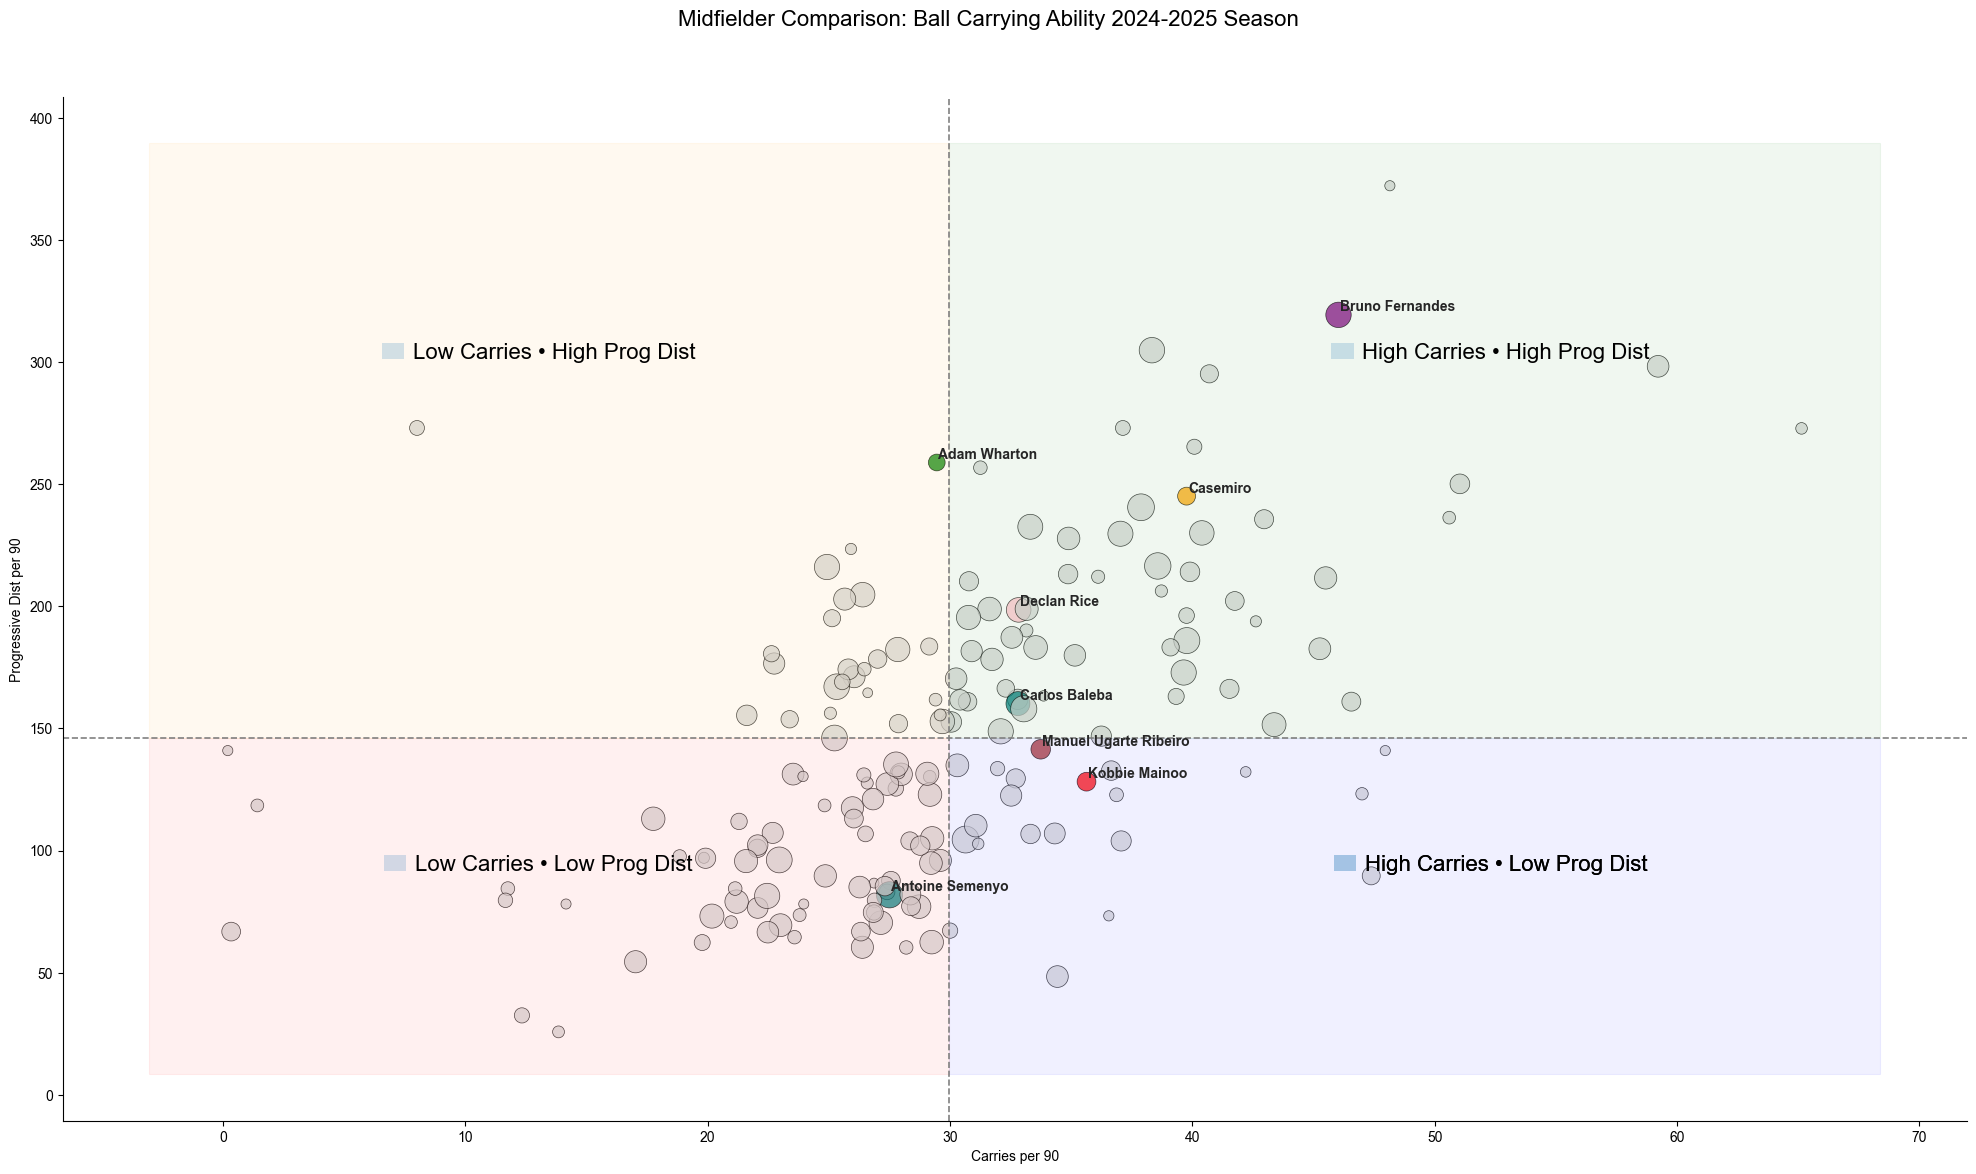

In [6]:

fig, axes = plt.subplots(figsize=(20, 12), sharey=True)
fig.suptitle("Midfielder Comparison: Ball Carrying Ability 2024-2025 Season", fontsize=16)


ball_security = midfielders.eval("touches_p90 / d_90")
playtime = midfielders["90s"] * 10

x_med = midfielders["carries_p90"].mean()
y_med = midfielders["prg_distp90"].mean()


players = ["Kobbie Mainoo", "Carlos Baleba", "Adam Wharton", "Bruno Fernandes", "Casemiro", "Manuel Ugarte Ribeiro", "Declan Rice", "Antoine Semenyo"]
mask = midfielders["player"].isin(players)
midfielders["legend"] = np.where(mask, midfielders["player"], "Other")

palette = {
    "Kobbie Mainoo": "red",
    "Carlos Baleba": "teal",
    "Adam Wharton": "green",
    "Bruno Fernandes": "purple",
    "Casemiro": "orange",
    "Manuel Ugarte Ribeiro": "brown",
    "Declan Rice": "pink",
    "Antoine Semenyo": "teal",
    "Other": "lightgrey"
}

regions = [
    ("Low Carries • Low Prog Dist",    (0.25, 0.25)),  # bottom-left
    ("Low Carries • High Prog Dist", (0.25, 0.75)),  # top-left
    ("High Carries • High Prog Dist",  (0.75, 0.75)),  # top-right
    ("High Carries • Low Prog Dist",   (0.75, 0.25)),  # bottom-right
]

for label, anchor in regions:
    leg = axes.legend(
        handles=[Patch(alpha=0.20, edgecolor="none", label=label)],
        loc="center", bbox_to_anchor=anchor, bbox_transform=axes.transAxes,
        frameon=False, handlelength=1.0, handletextpad=0.4, borderpad=0.2, fontsize=16,
        title=None
    )
    axes.add_artist(leg) 


#Styling the scatter plot
sns.set_theme()
#sns.set_style("ticks")
sns.despine()
sns.set_context("paper", font_scale=1.5)


# first subplot: carries per 90 vs progressive distance per 90 in 2024-2025 season
sns.scatterplot(data=midfielders, x="carries_p90", y="prg_distp90", ax=axes, hue="legend", s=playtime, palette=palette, legend=False, alpha=0.7, edgecolor="black", linewidth=0.5)
axes.axvline(x=x_med, color='grey', linestyle='--')
axes.axhline(y=y_med, color='grey', linestyle='--')
axes.set_xlabel("Carries per 90")
axes.set_ylabel("Progressive Dist per 90")

#Highlight quadrants
xmin, xmax = axes.get_xlim()
ymin, ymax = axes.get_ylim()

# 1) Subset rows to label
ann = midfielders.loc[mask, ["player", "carries_p90", "prg_distp90"]].dropna()

# 2) Small data-space offsets to reduce overlap with markers
dx = 0.001 * (xmax - xmin)
dy = 0.001 * (ymax - ymin)

# 3) Draw labels
for _, r in ann.iterrows():
    axes.text(
        r["carries_p90"] + dx, r["prg_distp90"] + dy, r["player"],
        fontsize=10, weight="bold", ha="left", va="bottom", zorder=5,
        
    )

axes.fill_between([xmin, x_med], ymin, y_med, color='red', alpha=0.06, label="Low Carries & Low Progressive Distance") #bottom-left
axes.fill_between([xmin, x_med], ymax, y_med, color='orange', alpha=0.06, label="High Progressive Dist & Low Carries") #top-left
axes.fill_betweenx([ymax, y_med], xmax, x_med, color='green', alpha=0.06, label="High Progressive Dist & High Carries") #top-right
axes.fill_betweenx([ymin, y_med], xmax, x_med, color='blue', alpha=0.06, label="High Carries & Low Progressive Distance") #bottom-right





plt.sca(axes)







# adjust layout to accommodate the suptitle
# use a tuple for `rect` to satisfy the type checker (tuple[float, float, float, float])
plt.tight_layout(rect=(0, 0, 1, 0.96))

display(midfielders.sort_values(by="carries_p90", ascending=False).head(10))
display(midfielders.sort_values(by="prg_distp90", ascending=False).head(10))

,team,player,90s,cmp,att,cmp_pct,prgdist,kp,1_3,prgp,player_id,position,fpl_pos,season,touches,def_pen,def_3rd,takeons,succ,carries,prgcdist,prgc,dispossessed,rec,prgr,passes_p90,prg_distp90,prg_passes90,touches_p90,def_pen_p90,carries_p90,def_3rd_p90,d_90,legend
265,FUL,Tom Cairney,7.0,569,627,90.7,1910,11,53,53,bcd71483,MID,MID,2425,683,12,123,13,5,456,1047,18,4,553,33,81.29,272.86,7.57,97.57,1.71,65.14,17.57,0.57,Other
374,MCI,Mateo Kovačić,24.4,1742,1882,92.6,7278,33,206,164,896e8a83,MID,MID,2425,2123,53,318,41,22,1445,3961,56,29,1729,16,71.39,298.28,6.72,87.01,2.17,59.22,13.03,1.19,Other
520,TOT,James Maddison,20.1,1021,1256,81.3,5028,41,123,164,c0f761bf,MID,MID,2425,1464,26,210,77,33,1026,2279,45,25,1125,95,50.80,250.15,8.16,72.84,1.29,51.04,10.45,1.24,Other
378,MCI,Nicolás González,8.4,575,625,92.0,1985,1,52,50,3164299a,MID,MID,2425,713,18,116,6,1,425,729,9,11,535,11,68.45,236.31,5.95,84.88,2.14,50.60,13.81,1.31,Other
595,WOL,Tommy Doyle,5.4,321,392,81.9,2010,7,44,40,37971fd8,MID,MID,2425,463,22,128,9,5,260,578,6,4,303,4,59.44,372.22,7.41,85.74,4.07,48.15,23.70,0.74,Other
259,FUL,Reiss Nelson,5.4,232,268,86.6,761,13,7,35,4a1a4c68,FWD,MID,2425,347,5,30,35,13,259,960,45,8,274,63,42.96,140.93,6.48,64.26,0.93,47.96,5.56,1.48,Other
368,MCI,Jeremy Doku,16.8,603,762,79.1,1506,32,12,69,a91bad3f,FWD,MID,2425,1027,4,46,201,107,796,4865,213,59,854,286,35.89,89.64,4.11,61.13,0.24,47.38,2.74,3.51,Other
365,MCI,Jack Grealish,8.0,382,436,87.6,986,24,23,52,19190f4a,FWD,MID,2425,521,15,42,29,13,376,1714,69,16,423,118,47.75,123.25,6.50,65.12,1.88,47.00,5.25,2.00,Other
375,MCI,Matheus Nunes,18.6,1065,1234,86.3,2994,23,53,79,14079bb1,DEF,MID,2425,1416,47,251,41,19,866,2315,63,13,1013,175,57.26,160.97,4.25,76.13,2.53,46.56,13.49,0.70,Other
395,MUN,Bruno Fernandes,33.5,1707,2242,76.1,10698,91,214,325,0c0888ab,MID,MID,2425,2649,62,428,67,28,1542,3866,77,43,1853,129,50.96,319.34,9.70,79.07,1.85,46.03,12.78,1.28,Bruno Fernandes


,team,player,90s,cmp,att,cmp_pct,prgdist,kp,1_3,prgp,player_id,position,fpl_pos,season,touches,def_pen,def_3rd,takeons,succ,carries,prgcdist,prgc,dispossessed,rec,prgr,passes_p90,prg_distp90,prg_passes90,touches_p90,def_pen_p90,carries_p90,def_3rd_p90,d_90,legend
595,WOL,Tommy Doyle,5.4,321,392,81.9,2010,7,44,40,37971fd8,MID,MID,2425,463,22,128,9,5,260,578,6,4,303,4,59.44,372.22,7.41,85.74,4.07,48.15,23.70,0.74,Other
395,MUN,Bruno Fernandes,33.5,1707,2242,76.1,10698,91,214,325,0c0888ab,MID,MID,2425,2649,62,428,67,28,1542,3866,77,43,1853,129,50.96,319.34,9.70,79.07,1.85,46.03,12.78,1.28,Bruno Fernandes
56,AVL,Youri Tielemans,33.6,1694,2061,82.2,10244,60,229,235,9ea328e2,MID,MID,2425,2385,103,479,61,31,1288,2551,39,29,1667,48,50.42,304.88,6.99,70.98,3.07,38.33,14.26,0.86,Other
374,MCI,Mateo Kovačić,24.4,1742,1882,92.6,7278,33,206,164,896e8a83,MID,MID,2425,2123,53,318,41,22,1445,3961,56,29,1729,16,71.39,298.28,6.72,87.01,2.17,59.22,13.03,1.19,Other
310,LEI,Harry Winks,17.1,910,1045,87.1,5048,17,110,101,93616e7c,MID,MID,2425,1158,49,275,12,3,696,1522,19,8,827,11,53.22,295.20,5.91,67.72,2.87,40.70,16.08,0.47,Other
550,WHU,James Ward-Prowse,11.5,677,768,88.2,3140,20,76,54,b7ddb9eb,MID,MID,2425,849,30,180,5,2,427,845,11,6,593,9,58.87,273.04,4.70,73.83,2.61,37.13,15.65,0.52,Other
549,WHU,James Ward-Prowse,11.5,677,768,88.2,3140,20,76,54,b7ddb9eb,MID,MID,2425,205,13,49,0,0,92,170,1,3,115,3,58.87,273.04,4.70,17.83,1.13,8.00,4.26,0.26,Other
265,FUL,Tom Cairney,7.0,569,627,90.7,1910,11,53,53,bcd71483,MID,MID,2425,683,12,123,13,5,456,1047,18,4,553,33,81.29,272.86,7.57,97.57,1.71,65.14,17.57,0.57,Other
398,MUN,Christian Eriksen,11.8,590,749,78.8,3131,31,54,55,69c23931,MID,MID,2425,850,26,173,4,0,473,851,13,5,566,29,50.00,265.34,4.66,72.03,2.20,40.08,14.66,0.42,Other
179,CRY,Adam Wharton,14.6,548,725,75.6,3780,26,78,107,3c41849c,MID,MID,2425,872,30,204,10,2,430,1078,14,13,533,11,37.53,258.90,7.33,59.73,2.05,29.45,13.97,0.89,Adam Wharton


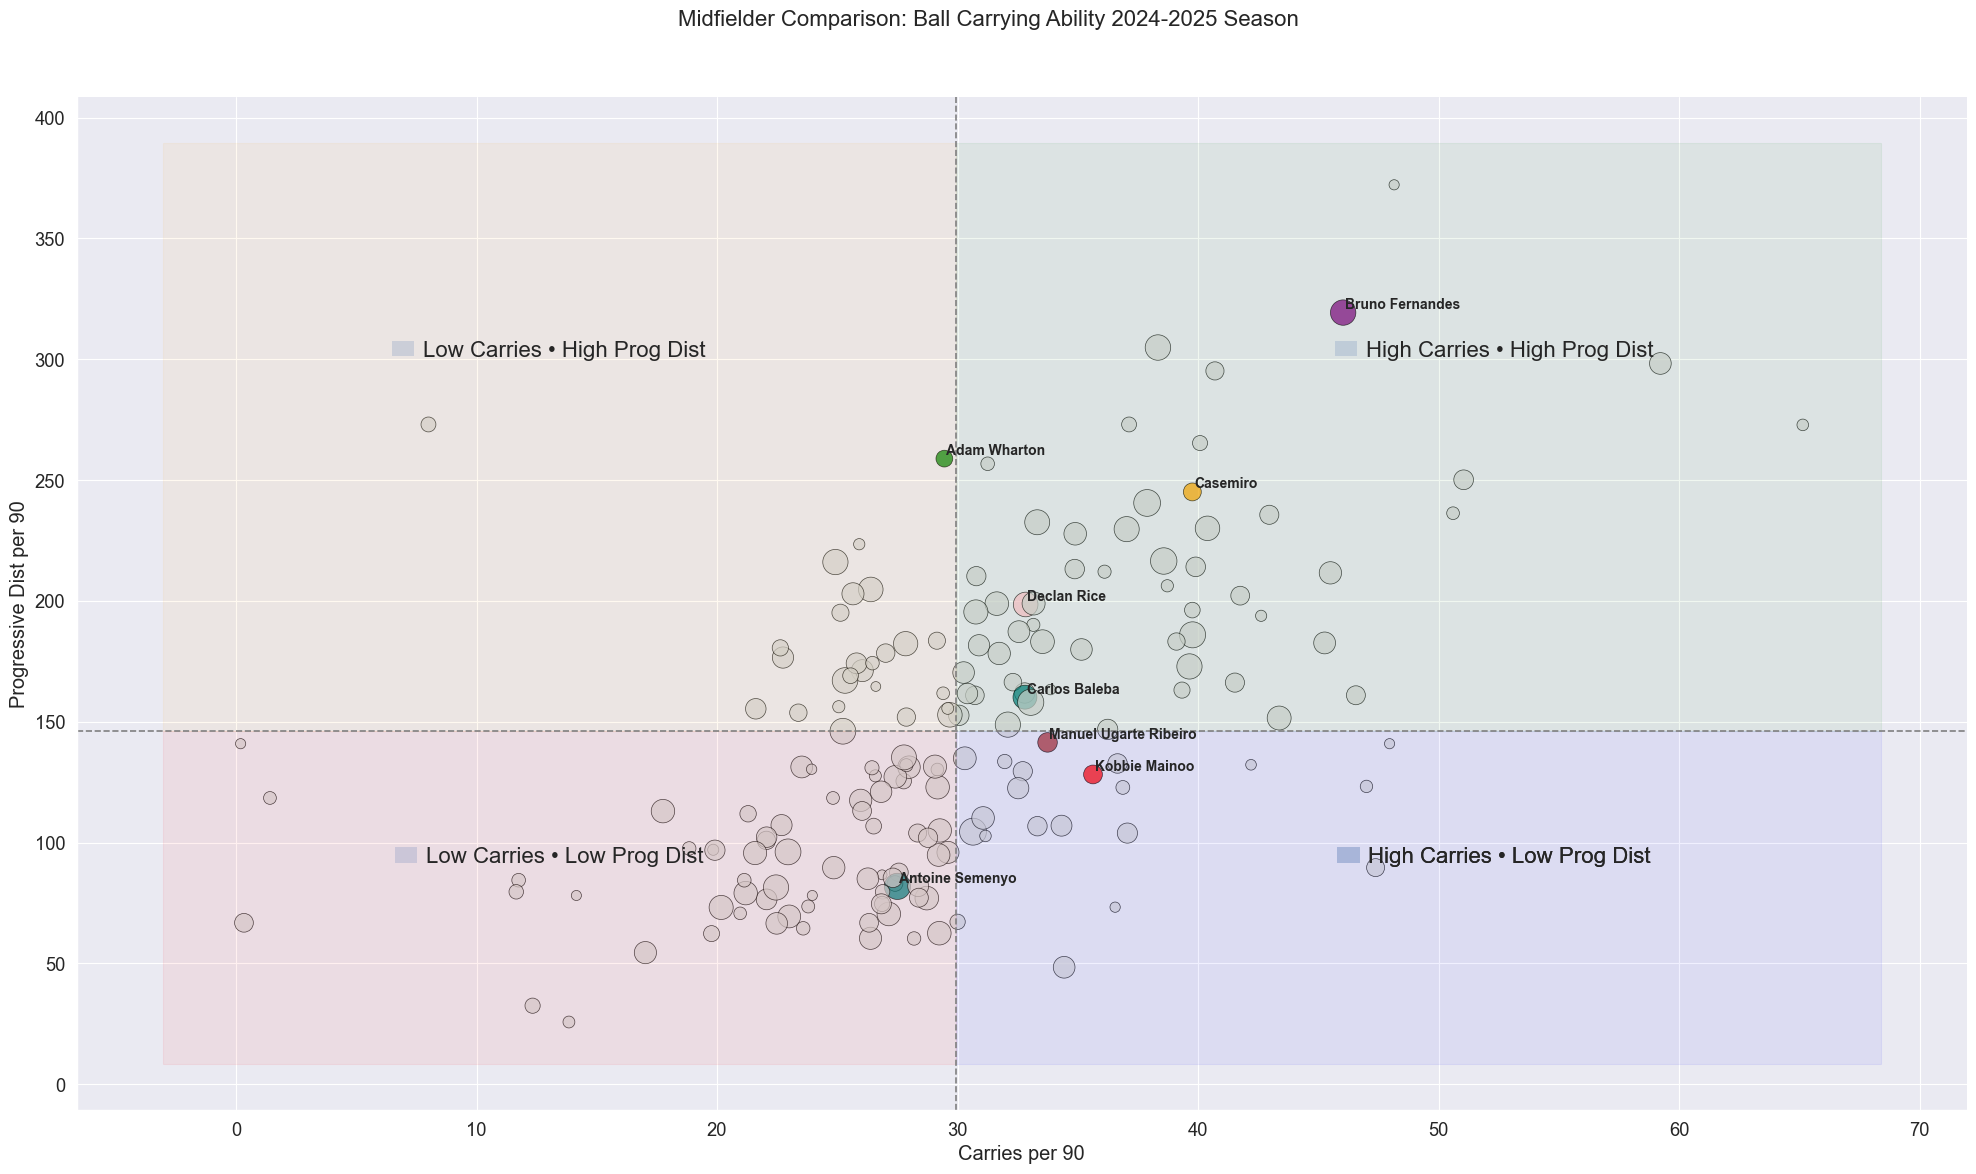

In [7]:

fig, axes = plt.subplots(figsize=(20, 12), sharey=True)
fig.suptitle("Midfielder Comparison: Ball Carrying Ability 2024-2025 Season", fontsize=16)


ball_security = midfielders.eval("touches_p90 / d_90")
playtime = midfielders["90s"] * 10

x_med = midfielders["carries_p90"].mean()
y_med = midfielders["prg_distp90"].mean()


players = ["Kobbie Mainoo", "Carlos Baleba", "Adam Wharton", "Bruno Fernandes", "Casemiro", "Manuel Ugarte Ribeiro", "Declan Rice", "Antoine Semenyo"]
mask = midfielders["player"].isin(players)
midfielders["legend"] = np.where(mask, midfielders["player"], "Other")

palette = {
    "Kobbie Mainoo": "red",
    "Carlos Baleba": "teal",
    "Adam Wharton": "green",
    "Bruno Fernandes": "purple",
    "Casemiro": "orange",
    "Manuel Ugarte Ribeiro": "brown",
    "Declan Rice": "pink",
    "Antoine Semenyo": "teal",
    "Other": "lightgrey"
}

regions = [
    ("Low Carries • Low Prog Dist",    (0.25, 0.25)),  # bottom-left
    ("Low Carries • High Prog Dist", (0.25, 0.75)),  # top-left
    ("High Carries • High Prog Dist",  (0.75, 0.75)),  # top-right
    ("High Carries • Low Prog Dist",   (0.75, 0.25)),  # bottom-right
]

for label, anchor in regions:
    leg = axes.legend(
        handles=[Patch(alpha=0.20, edgecolor="none", label=label)],
        loc="center", bbox_to_anchor=anchor, bbox_transform=axes.transAxes,
        frameon=False, handlelength=1.0, handletextpad=0.4, borderpad=0.2, fontsize=16,
        title=None
    )
    axes.add_artist(leg) 


#Styling the scatter plot
sns.set_theme()
#sns.set_style("ticks")
sns.despine()
sns.set_context("paper", font_scale=1.5)


# first subplot: carries per 90 vs progressive distance per 90 in 2024-2025 season
sns.scatterplot(data=midfielders, x="carries_p90", y="prg_distp90", ax=axes, hue="legend", s=playtime, palette=palette, legend=False, alpha=0.7, edgecolor="black", linewidth=0.5)
axes.axvline(x=x_med, color='grey', linestyle='--')
axes.axhline(y=y_med, color='grey', linestyle='--')
axes.set_xlabel("Carries per 90")
axes.set_ylabel("Progressive Dist per 90")

#Highlight quadrants
xmin, xmax = axes.get_xlim()
ymin, ymax = axes.get_ylim()

# 1) Subset rows to label
ann = midfielders.loc[mask, ["player", "carries_p90", "prg_distp90"]].dropna()

# 2) Small data-space offsets to reduce overlap with markers
dx = 0.001 * (xmax - xmin)
dy = 0.001 * (ymax - ymin)

# 3) Draw labels
for _, r in ann.iterrows():
    axes.text(
        r["carries_p90"] + dx, r["prg_distp90"] + dy, r["player"],
        fontsize=10, weight="bold", ha="left", va="bottom", zorder=5,
        
    )

axes.fill_between([xmin, x_med], ymin, y_med, color='red', alpha=0.06, label="Low Carries & Low Progressive Distance") #bottom-left
axes.fill_between([xmin, x_med], ymax, y_med, color='orange', alpha=0.06, label="High Progressive Dist & Low Carries") #top-left
axes.fill_betweenx([ymax, y_med], xmax, x_med, color='green', alpha=0.06, label="High Progressive Dist & High Carries") #top-right
axes.fill_betweenx([ymin, y_med], xmax, x_med, color='blue', alpha=0.06, label="High Carries & Low Progressive Distance") #bottom-right





plt.sca(axes)







# adjust layout to accommodate the suptitle
# use a tuple for `rect` to satisfy the type checker (tuple[float, float, float, float])
plt.tight_layout(rect=(0, 0, 1, 0.96))

display(midfielders.sort_values(by="carries_p90", ascending=False).head(10))
display(midfielders.sort_values(by="prg_distp90", ascending=False).head(10))

,team,player,90s,cmp,att,cmp_pct,prgdist,kp,1_3,prgp,player_id,position,fpl_pos,season,touches,def_pen,def_3rd,takeons,succ,carries,prgcdist,prgc,dispossessed,rec,prgr,passes_p90,prg_distp90,prg_passes90,touches_p90,def_pen_p90,carries_p90,def_3rd_p90,d_90,legend
376,MCI,Rodri,32.6,3365,3656,92.0,15766,49,378,376,bdf572d7,MID,MID,2324,3988,114,664,64,42,2513,6408,76,32,3242,55,103.22,483.62,11.53,122.33,3.50,27.92,20.37,0.98,Rodri
141,BHA,Pascal Groß,34.6,2774,3223,86.1,13360,103,242,302,8695796f,MID,MID,2324,3534,133,826,30,16,2284,5189,83,28,2736,180,80.17,386.13,8.73,102.14,3.84,25.38,23.87,0.81,Other
417,NEW,Bruno Guimarães,36.3,1941,2313,83.9,9336,62,184,283,d307d495,MID,MID,2324,2734,90,573,132,72,1842,4241,65,70,2107,73,53.47,257.19,7.80,75.32,2.48,20.47,15.79,1.93,Other
5,ARS,Declan Rice,35.8,2041,2295,88.9,9378,47,240,278,59424615,MID,MID,2324,2650,100,581,46,21,1675,5139,75,22,1928,64,57.01,261.96,7.77,74.02,2.79,18.61,16.23,0.61,Declan Rice
18,ARS,Martin Ødegaard,34.3,1692,2006,84.3,7898,102,160,344,06ab6f9c,MID,MID,2324,2326,24,244,81,37,1563,3514,91,58,1827,202,49.33,230.26,10.03,67.81,0.70,17.37,7.11,1.69,Other
352,MCI,Bernardo Silva,28.6,1671,1936,86.3,5246,64,100,177,b845a912,MID,MID,2324,2194,39,245,61,38,1500,4544,140,34,1757,260,58.43,183.43,6.19,76.71,1.36,16.67,8.57,1.19,Other
190,CHE,Conor Gallagher,34.8,1801,2018,89.2,5954,52,135,172,808a57c7,MID,MID,2324,2443,77,468,65,38,1453,2979,62,39,1739,122,51.75,171.09,4.94,70.20,2.21,16.14,13.45,1.12,Other
374,MCI,Phil Foden,31.7,1511,1767,85.5,3769,73,71,168,00a05a27,FWD,MID,2324,2146,22,174,102,47,1435,3434,93,49,1753,269,47.67,118.90,5.30,67.70,0.69,15.94,5.49,1.55,Other
122,BHA,Billy Gilmour,23.6,1915,2107,90.9,7671,22,183,193,f70870eb,MID,MID,2324,2277,67,447,23,8,1410,3120,39,9,1871,33,81.14,325.04,8.18,96.48,2.84,15.67,18.94,0.38,Other
32,AVL,Douglas Luiz,33.3,1800,2101,85.7,7807,53,137,168,cac8d239,MID,MID,2324,2351,81,519,47,24,1394,3562,60,31,1638,50,54.05,234.44,5.05,70.60,2.43,15.49,15.59,0.93,Other


,team,player,90s,cmp,att,cmp_pct,prgdist,kp,1_3,prgp,player_id,position,fpl_pos,season,touches,def_pen,def_3rd,takeons,succ,carries,prgcdist,prgc,dispossessed,rec,prgr,passes_p90,prg_distp90,prg_passes90,touches_p90,def_pen_p90,carries_p90,def_3rd_p90,d_90,legend
538,TOT,Pierre Højbjerg,14.6,1234,1415,87.2,7286,9,160,134,11c662b1,MID,MID,2324,1584,63,377,23,12,1013,1820,17,9,1231,29,84.52,499.04,9.18,108.49,4.32,11.26,25.82,0.62,Other
376,MCI,Rodri,32.6,3365,3656,92.0,15766,49,378,376,bdf572d7,MID,MID,2324,3988,114,664,64,42,2513,6408,76,32,3242,55,103.22,483.62,11.53,122.33,3.50,27.92,20.37,0.98,Rodri
141,BHA,Pascal Groß,34.6,2774,3223,86.1,13360,103,242,302,8695796f,MID,MID,2324,3534,133,826,30,16,2284,5189,83,28,2736,180,80.17,386.13,8.73,102.14,3.84,25.38,23.87,0.81,Other
527,TOT,Giovani Lo Celso,5.6,449,503,89.3,2073,18,44,68,ce49bc78,MID,MID,2324,570,13,85,14,8,361,946,25,7,456,29,80.18,370.18,12.14,101.79,2.32,4.01,15.18,1.25,Other
387,MUN,Casemiro,22.0,1165,1425,81.8,7677,16,124,112,f17463ac,MID,MID,2324,1762,169,646,18,9,984,1729,12,17,1163,36,52.95,348.95,5.09,80.09,7.68,10.93,29.36,0.77,Casemiro
192,CHE,Enzo Fernández,24.5,1574,1862,84.5,8415,32,177,210,4ff037a3,MID,MID,2324,2128,67,442,44,23,1315,3109,52,24,1675,54,64.24,343.47,8.57,86.86,2.73,14.61,18.04,0.98,Other
14,ARS,Jorginho,10.2,699,785,89.0,3439,10,81,101,5be7a3e1,MID,MID,2324,871,25,154,5,2,521,945,8,4,671,8,68.53,337.16,9.90,85.39,2.45,5.79,15.10,0.39,Other
122,BHA,Billy Gilmour,23.6,1915,2107,90.9,7671,22,183,193,f70870eb,MID,MID,2324,2277,67,447,23,8,1410,3120,39,9,1871,33,81.14,325.04,8.18,96.48,2.84,15.67,18.94,0.38,Other
544,TOT,Yves Bissouma,23.0,1689,1842,91.7,7214,11,156,169,82ee6644,MID,MID,2324,2119,97,469,47,27,1367,3006,43,30,1641,13,73.43,313.65,7.35,92.13,4.22,15.19,20.39,1.30,Other
598,WOL,Tommy Doyle,13.6,801,955,83.9,4208,8,86,81,37971fd8,MID,MID,2324,1061,40,265,3,1,637,1408,21,7,766,17,58.90,309.41,5.96,78.01,2.94,7.08,19.49,0.51,Other


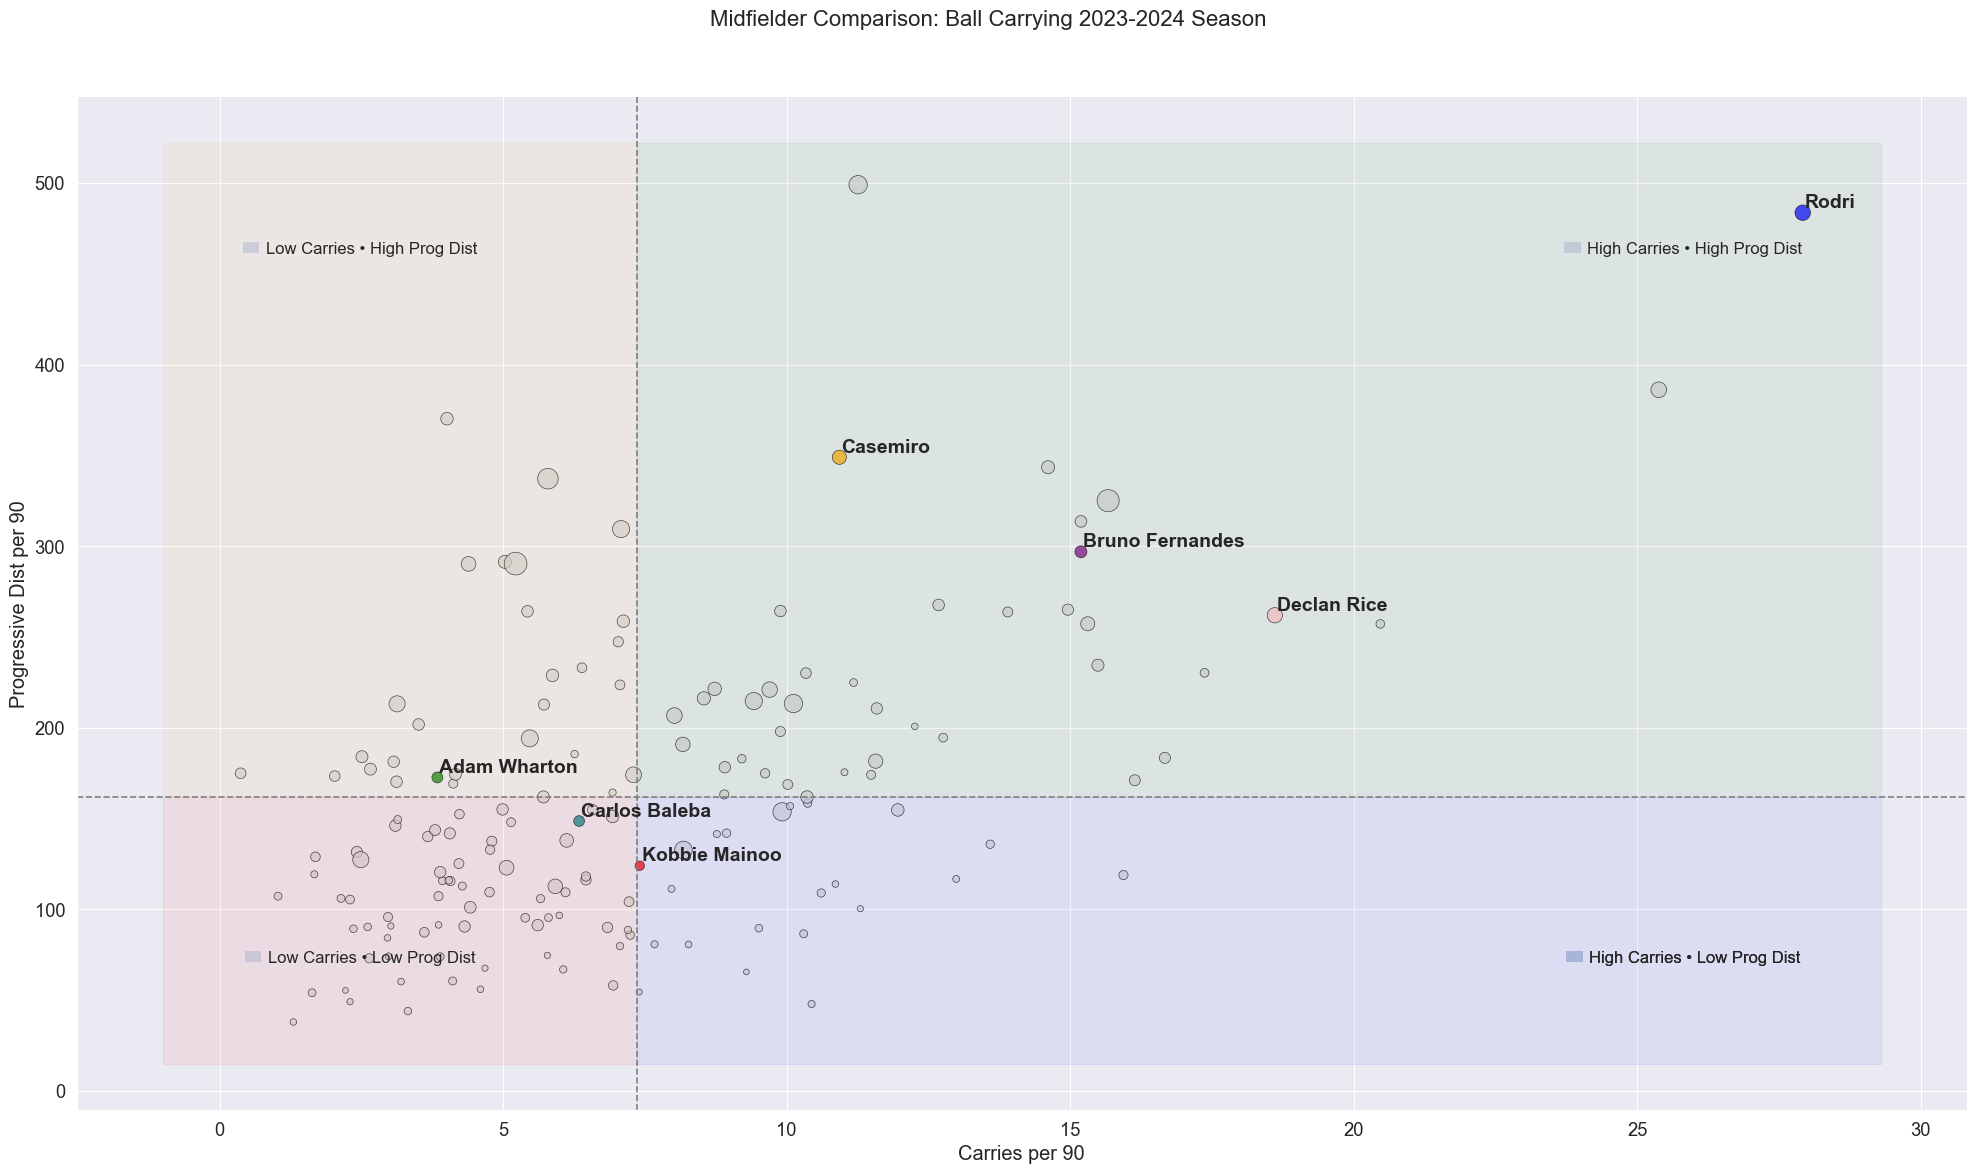

In [8]:

fig, axes = plt.subplots(figsize=(20, 12), sharey=True)
fig.suptitle("Midfielder Comparison: Ball Carrying 2023-2024 Season", fontsize=16)

ball_security_2024 = mids.eval("touches_p90 / d_90")


x_2024_med = mids["carries_p90"].mean()
y_2024_med = mids["prg_distp90"].mean()



players = ["Kobbie Mainoo", "Carlos Baleba", "Adam Wharton", "Bruno Fernandes", "Casemiro", "Manuel Ugarte Ribeiro", "Declan Rice", "Antoine Semenyo", "Rodri"]
mask_2024 = mids["player"].isin(players)
mids["legend"] = np.where(mask_2024, mids["player"], "Other")

palette = {
    "Kobbie Mainoo": "red",
    "Carlos Baleba": "teal",
    "Adam Wharton": "green",
    "Bruno Fernandes": "purple",
    "Casemiro": "orange",
    "Manuel Ugarte Ribeiro": "brown",
    "Antoine Semenyo": "teal",
    "Declan Rice": "pink",
    "Rodri": "blue",
    "Other": "lightgrey"
}

regions = [
    ("Low Carries • Low Prog Dist",    (0.15, 0.15)),  # bottom-left
    ("Low Carries • High Prog Dist", (0.15, 0.85)),  # top-left
    ("High Carries • High Prog Dist",  (0.85, 0.85)),  # top-right
    ("High Carries • Low Prog Dist",   (0.85, 0.15)),  # bottom-right
]

for label, anchor in regions:
    leg = axes.legend(
        handles=[Patch(alpha=0.20, edgecolor="none", label=label)],
        loc="center", bbox_to_anchor=anchor, bbox_transform=axes.transAxes,
        frameon=False, handlelength=1.0, handletextpad=0.4, borderpad=0.2, fontsize=12,
        title=None
    )
    axes.add_artist(leg) 


#Styling the scatter plot
sns.set_theme()
#sns.set_style("ticks")
sns.despine()
sns.set_context("paper", font_scale=1.5)



#plot with carries per 90 vs progressive distance per 90 in 2023-2024 season
sns.scatterplot(data=mids, x="carries_p90", y="prg_distp90", ax=axes, hue="legend", s=ball_security_2024, palette=palette, legend=False, alpha=0.7, edgecolor="black", linewidth=0.5)
axes.axvline(x=x_2024_med, color='grey', linestyle='--')
axes.axhline(y=y_2024_med, color='grey', linestyle='--')
axes.set_xlabel("Carries per 90")
axes.set_ylabel("Progressive Dist per 90")

#Highlight quadrants
xmin, xmax = axes.get_xlim()
ymin, ymax = axes.get_ylim()

# 1) Subset rows to label
ann = mids.loc[mask_2024, ["player", "carries_p90", "prg_distp90"]].dropna()

# 2) Small data-space offsets to reduce overlap with markers
dx = 0.001 * (xmax - xmin)
dy = 0.001 * (ymax - ymin)

# 3) Draw labels
for _, r in ann.iterrows():
    axes.text(
        r["carries_p90"] + dx, r["prg_distp90"] + dy, r["player"],
        fontsize=14, weight="bold", ha="left", va="bottom", zorder=5,
        
    )



axes.fill_between([xmin, x_2024_med], ymin, y_2024_med, color='red', alpha=0.06) #bottom-left
axes.fill_between([xmin, x_2024_med], ymax, y_2024_med, color='orange', alpha=0.06) #top-left
axes.fill_betweenx([ymax, y_2024_med], xmax, x_2024_med, color='green', alpha=0.06) #top-right
axes.fill_betweenx([ymin, y_2024_med], xmax, x_2024_med, color='blue', alpha=0.06) #bottom-right
plt.sca(axes)

# second subplot: passes per 90 vs progressive distance per 90
#sns.scatterplot(data=midfielders, x="passes_p90", y="prg_distp90", ax=axes, hue="player", s=100)
#axes.set_title("Passes per 90 vs Progressive Distance per 90")
#axes.set_xlabel("passes per 90")
#axes.set_ylabel("progressive distance per 90")
#plt.sca(axes)
#plt.xticks(rotation=45, ha="right")

# adjust layout to accommodate the suptitle
plt.tight_layout(rect=[0, 0, 1, 0.96])

display(mids.sort_values(by="carries_p90", ascending=False).head(10))
display(mids.sort_values(by="prg_distp90", ascending=False).head(10))



In [9]:
defending_df = pd.read_csv('../data/processed/fbref/ENG-Premier League/2024-2025/team_match/defense.csv', usecols=["team", "team_id", "opponent_id", "ga"])
Pl_defending_df = pd.read_csv('../data/processed/fbref/ENG-Premier League/2024-2025/player_match/defense.csv', usecols=["team", "team_id", "opponent_id","player", "player_id","min","position", "fpl_pos", "tkl", "tklw", "def_3rd", "mid_3rd", "att_3rd", "blocks", "int", "clr", "err"])


def_df = Pl_defending_df.merge(
    defending_df,
    on=["team", "team_id", "opponent_id"],
    how="left"
)

display(def_df.head())

,team,player,min,tkl,tklw,def_3rd,mid_3rd,att_3rd,blocks,int,clr,err,player_id,team_id,opponent_id,position,fpl_pos,ga
0,FUL,Adama Traoré,77,1,0,1,0,0,1,0,0,0,b8e5dbd7,049e06ec,767ff900,MID,MID,1
1,FUL,Adama Traoré,77,1,0,1,0,0,1,0,0,0,b8e5dbd7,049e06ec,767ff900,MID,MID,1
2,FUL,Alex Iwobi,90,4,3,1,2,1,0,0,1,0,bbdefb2c,049e06ec,767ff900,MID,MID,1
3,FUL,Alex Iwobi,90,4,3,1,2,1,0,0,1,0,bbdefb2c,049e06ec,767ff900,MID,MID,1
4,FUL,Andreas Pereira,89,0,0,0,0,0,1,0,0,0,a00aee92,049e06ec,767ff900,MID,MID,1


In [10]:
exp_pts = pd.read_csv("../data/models/expected_points/v2/expected_points.csv", usecols=["player_id", "player", "xPts", "aPts", "pos", "gw_orig"]).sort_values(by=["gw_orig"], ascending=True).drop_duplicates(subset=["player_id"])

display(exp_pts.head())

,gw_orig,player_id,player,pos,xPts,aPts
0,26,00a05a27,Phil Foden,MID,5.2,2.0
205,26,a91bad3f,Jeremy Doku,MID,1.9,2.0
204,26,a888d251,David Brooks,MID,2.8,1.0
203,26,a75fe07a,Sávio,MID,6.7,2.0
202,26,a6d76266,Ryan Gravenberch,MID,2.3,3.0


In [11]:
gw_26 = exp_pts.loc[exp_pts["gw_orig"]==26].copy()

mid_26 = gw_26.loc[gw_26["pos"]=="GK"].copy()
display(mid_26.sort_values(by="xPts", ascending=False).head(10))
display(mid_26.sort_values(by="aPts", ascending=False).head(10))

,gw_orig,player_id,player,pos,xPts,aPts
22,26,116a07a4,Alex Palmer,GK,2.8,0.0
6,26,044dffb5,Mads Hermansen,GK,2.7,1.0
281,26,ece7cacd,Filip Jørgensen,GK,2.7,2.0
138,26,6a213841,David Raya,GK,2.7,2.0
87,26,4099702f,Aaron Ramsdale,GK,2.6,1.0
223,26,b7f5d6fd,Jordan Pickford,GK,2.6,1.0
73,26,3ae7f0de,Ederson,GK,2.5,1.0
105,26,4fee2cbf,Matz Sels,GK,2.5,0.0
98,26,4a518130,Guglielmo Vicario,GK,2.5,3.0
242,26,c682af73,Nick Pope,GK,2.5,1.0


,gw_orig,player_id,player,pos,xPts,aPts
193,26,9cd4f90e,José Sá,GK,1.8,9.0
32,26,1c2cd7dd,Alisson,GK,1.7,8.0
114,26,549413e7,Mark Flekken,GK,2.3,7.0
185,26,94b6af52,Alphonse Areola,GK,2.3,6.0
181,26,8ddd7a00,Bart Verbruggen,GK,2.5,6.0
131,26,63d000f4,Dean Henderson,GK,2.3,6.0
124,26,5dfb108b,Emiliano Martínez,GK,2.2,3.0
98,26,4a518130,Guglielmo Vicario,GK,2.5,3.0
265,26,daa4845a,André Onana,GK,1.9,3.0
70,26,3a632321,Bernd Leno,GK,2.3,2.0
